In [ ]:
import gym
env = gym.make("FrozenLake8x8-v1", is_slippery=False)
env = env.unwrapped #buka lingkungan untuk mengakses info lingkungan lebih lanjut
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
#instal dependensi untuk merender gym environment
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1

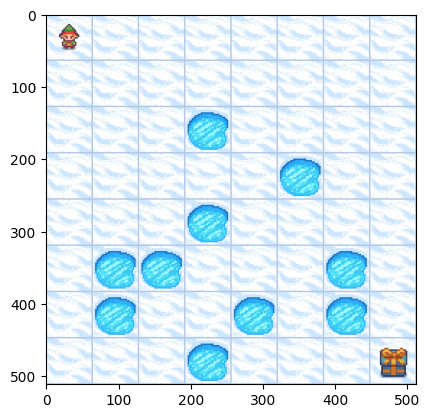

In [ ]:
#menampilkan lingkungan gym Frozen Lake 8x8
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
import numpy as np

env.reset() #reset environment
display = Display(visible=0, size=(400, 300))
display.start()
screen = env.render(mode='rgb_array')
plt.imshow(screen)

In [ ]:
#mencari observation space (state space)
state_space = env.observation_space
print(f"observation space: {state_space}")

#menghitung jumlah state
n_states = env.observation_space.n
print(f"jumlah state: {n_states}")

#menentukan action space
action_space = env.action_space
print(f"action space: {action_space}")

#menghitung jumlah action
n_actions = env.action_space.n
print(f"jumlah action: {n_actions}")

#menghitung probabilitas transisi
transition_probs = env.P

observation space: Discrete(64)
jumlah state: 64
action space: Discrete(4)
jumlah action: 4


In [ ]:
#print contoh action
action_key = {0:'Kiri', 1:'Bawah', 2:'Kanan', 3:'Atas'}
sample_action = action_space.sample() #random action
action_name = action_key[sample_action]
print(f"Contoh tindakan adalah: {sample_action, action_name}")

Contoh tindakan adalah: (1, 'Bawah')


In [ ]:
#lakukan 1 langkah menggunakan sample action
state, reward, terminated, truncated, info = env.step(sample_action)
#mencetak state, reward, whether episode terminated & probabilitas transisi dari tiap step
print(f"state: {state}, reward: {reward}, terminated: {terminated}, {info}")

state: 8, reward: 0.0, terminated: False, {'prob': 1.0}


0

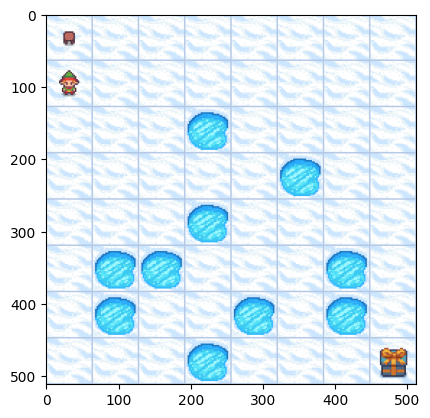

In [ ]:
#display 1 step using sample action
display = Display(visible=0, size=(400, 300))
display.start()
screen = env.render(mode='rgb_array')
plt.imshow(screen)
env.reset() #reset environment

In [ ]:
#menghitung fungsi nilai (persamaan Bellman)
def state_action_value(V, s, a, gamma=0.9):  #gamma adalah discount factor dari MDP
    Q = np.sum([p * (rew + gamma*V[s_prime]) for p, s_prime, rew, _ in transition_probs[s][a]])
    return Q

In [ ]:
#perbarui fungsi nilai hingga kondisi stabil tercapai (mis., <min_difference tercapai)
def policy_evaluation(V, policy):
    while True:
        difference = 0
        #loop di semua state
        for s in range(n_states):
            old_V = V[s]
            #update V[s] menggunakan persamaan Bellman di atas
            V[s] = state_action_value(V, s, policy[s])
            difference = max(difference, np.abs(old_V - V[s]))

        if difference < min_difference:
          print("Terminated")
          break

In [ ]:
#update policy berdasarkan Q value
def policy_improvement(V, policy):
    policy_stable = True
    for s in range(n_states):
        old_a = policy[s]
        #perbarui policy dengan action yang menghasilkan nilai tertinggi
        policy[s] = np.argmax([state_action_value(V, s, a) for a in range(n_actions)])
        if old_a != policy[s]: 
            policy_stable = False

    return policy_stable

In [ ]:
#tentukan parameter untuk iterasi nilai & policy

min_difference = 0.0005 #hentikan iterasi nilai jika nilai difference kurang dari 0.0005

#inisiasi fungsi nilai dan policy
V = np.zeros(n_states)
policy = np.zeros(n_states)

#setel state ke tidak stabil untuk memungkinkan pencarian greedy state
policy_stable = False

In [ ]:
#lacak sejumlah state yang diambil agar policy dapat konvergen
steps = 0

while not policy_stable:
  policy_evaluation(V, policy)
  policy_stable = policy_improvement(V, policy)
  steps += 1

print(f'Konvergen setelah {steps} step')

Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Konvergen setelah 15 step


In [ ]:
#menampilkan fungsi nilai untuk setiap state
print(f'Fungsi nilai untuk setiap state:\n{V}')

Fungsi nilai untuk setiap state:
[0.25418658 0.28242954 0.3138106  0.34867844 0.38742049 0.43046721
 0.4782969  0.531441   0.28242954 0.3138106  0.34867844 0.38742049
 0.43046721 0.4782969  0.531441   0.59049    0.3138106  0.34867844
 0.38742049 0.         0.4782969  0.531441   0.59049    0.6561
 0.34867844 0.38742049 0.43046721 0.4782969  0.531441   0.
 0.6561     0.729      0.3138106  0.34867844 0.38742049 0.
 0.59049    0.6561     0.729      0.81       0.28242954 0.
 0.         0.59049    0.6561     0.729      0.         0.9
 0.3138106  0.         0.4782969  0.531441   0.         0.81
 0.         1.         0.34867844 0.38742049 0.43046721 0.
 0.81       0.9        1.         0.        ]


In [ ]:
#print optimal policy
print(f'Optimal policy is:\n{policy}')
policy_name=[]
for action in policy:
  policy_name.append(action_key[action])
print(policy_name)

Optimal policy is:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 2. 1. 1.
 2. 2. 2. 2. 1. 0. 1. 1. 2. 2. 3. 0. 1. 1. 2. 1. 1. 0. 0. 2. 2. 1. 0. 1.
 1. 0. 2. 3. 0. 1. 0. 1. 2. 2. 3. 0. 2. 2. 2. 0.]
['Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Kanan', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Bawah', 'Kiri', 'Bawah', 'Kanan', 'Bawah', 'Bawah', 'Kanan', 'Kanan', 'Kanan', 'Kanan', 'Bawah', 'Kiri', 'Bawah', 'Bawah', 'Kanan', 'Kanan', 'Atas', 'Kiri', 'Bawah', 'Bawah', 'Kanan', 'Bawah', 'Bawah', 'Kiri', 'Kiri', 'Kanan', 'Kanan', 'Bawah', 'Kiri', 'Bawah', 'Bawah', 'Kiri', 'Kanan', 'Atas', 'Kiri', 'Bawah', 'Kiri', 'Bawah', 'Kanan', 'Kanan', 'Atas', 'Kiri', 'Kanan', 'Kanan', 'Kanan', 'Kiri']


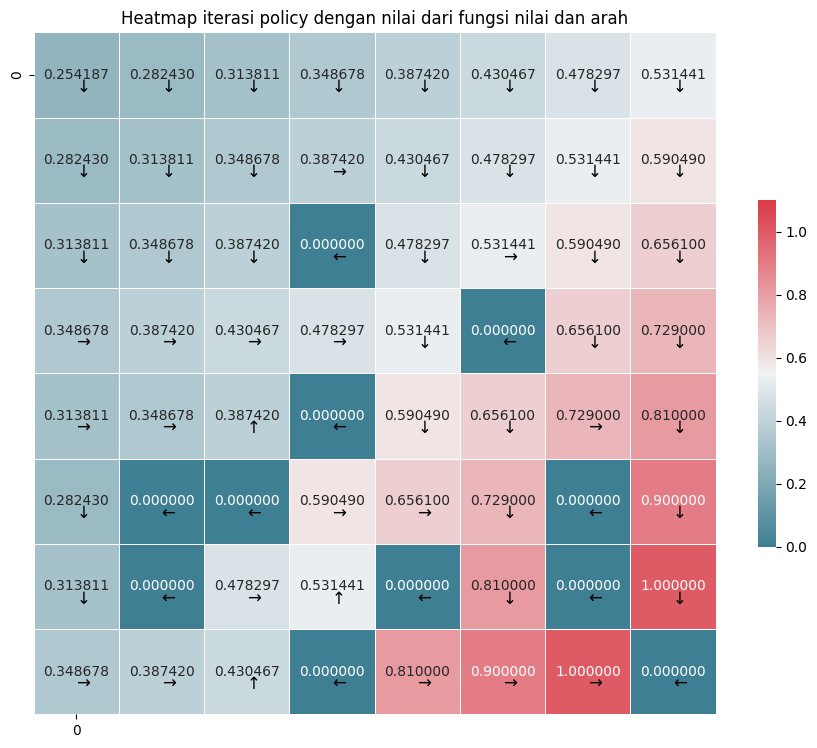

In [ ]:
#menampilkan heatmap dari iterasi policy
import seaborn
grid=8
def display_heatmap(value_func,policy_str):
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped=np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap=cmap, vmax=1.1,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter=0
    for j in range(0, 8):
        for i in range(0, 8):
            if policy_str[counter]=="Bawah":
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif policy_str[counter]=="Atas":
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif policy_str[counter]=="Kiri":
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1
    plt.title('Heatmap iterasi policy dengan nilai dari fungsi nilai dan arah')

display_heatmap(V,policy_name)

In [ ]:
#define states and transition probabilities for Markov Chain diagram of 4 example states from FrozenLake8x8
states = [(0, 0),
          (0, 1),
          (1, 0),
          (1, 1)]

transition_probs =[[0.5, 0.25, 0.25, 0.0], 
    [0.25, 0.25, 0.0, 0.25],
    [0.25, 0.0, 0.25, 0.25],
    [0.0, 0.25, 0.25, 0.0]]

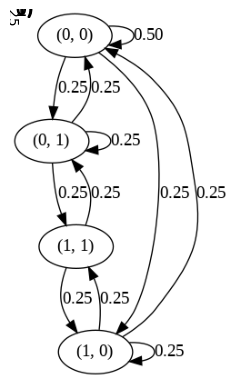

In [ ]:
#draw Markov Chain from code created by NetworkX:
#https://networkx.org/documentation/stable/reference/classes/multidigraph.html

from networkx.drawing.nx_pydot import write_dot
import networkx as nx

G = nx.MultiDiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states):
    for j, destination_state in enumerate(states):
        rate = transition_probs[i][j]
        if rate > 0:
            G.add_edge(origin_state, destination_state, weight=rate, label="{:.02f}".format(rate))
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

node_size = 200
pos = {state:list(state) for state in states}
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(G, pos, font_weight=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

write_dot(G, 'mc.dot')

#save image
from subprocess import check_call
nfile = 'w.png' 
check_call(['dot', '-Tpng', 'mc.dot', '-o', nfile])

#display image
import matplotlib.image as mpimg
img = mpimg.imread(nfile)
plt.axis('off')
plt.imshow(img)

In [ ]:
#buat environment Danau Beku yang licin untuk perbandingan
env = gym.make("FrozenLake8x8-v1", is_slippery=True)
env = env.unwrapped #unwrap environment untuk mengakses info environment lebih lanjut
env.reset()

0

In [ ]:
#mencari observation space (state space)
state_space = env.observation_space

#menghitung jumlah state
n_states = env.observation_space.n

#menentukan action space
action_space = env.action_space

#menghitung jumlah action
n_actions = env.action_space.n

#menghitung probabilitas transisi
transition_probs = env.P

In [ ]:
#initialize value function and policy
V = np.zeros(n_states)
policy = np.zeros(n_states)

#set policy to unstable to allow search for greedy policy
policy_stable = False

#track number of steps taken for policy to converge
steps = 0

while not policy_stable:
  policy_evaluation(V, policy)
  policy_stable = policy_improvement(V, policy)
  steps += 1

print(f'Converged after {steps} steps')

Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Terminated
Converged after 10 steps


In [ ]:
#perform iterations of game
def run_steps(env, policy, n_iterations):
    state = env.reset() #reset environment
    total_reward = 0 #for tracking cumulative reward over iterations

    for _ in range(n_iterations):
        done = False
        while not done:
            state_prime, reward, done,_,_ = env.step(policy[state])
                
            state = state_prime
            total_reward += reward 
            if done:
                state = env.reset()
    return total_reward

In [ ]:
#temukan hasil reward rata-rata lebih dari 10000 langkah
#bernilai antara 0-1, karena 0 gagal dan 1 sukses
n_iterations=10000
total_reward=run_steps(env, policy, n_iterations)
average_reward=total_reward/n_iterations
print(f'Reward rata-rata lebih dari 10000 langkah adalah {average_reward}')

Reward rata-rata lebih dari 10000 langkah adalah 0.752
